<h1 style=text-align:center;color:brown;font:bold> Data PreProcessing </h1>

## Divided into 6 parts
    * Common Data preparation tasks
    * Data Cleaning
    * Feature Selection
    * Data Transformation
    * Feature engineering
    * Dimensionality Reduction

<h1 style=text-align:center;color:blue;font:bold> Feature Selection </h1>

<h1 style=text-align:left;color:purple;font:bold> Why Feature Selection ? </h1>

Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in many cases, to improve the performance of the model. 

Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable. These methods can be fast and effective, although the choice of statistical measures depends on the data type of both the input and output variables.

As such, it can be challenging for a machine learning practitioner to select an appropriate statistical measure for a dataset when performing filter-based feature selection. In this tutorial, you will discover how to choose statistical measures for filter-based feature selection with numerical and categorical data.

* There are two main types of feature selection techniques: supervised and unsupervised, and supervised methods may be divided into wrapper, filter and intrinsic.

* Filter-based feature selection methods use statistical measures to score the correlation or dependence between input variables that can be filtered to choose the most relevant features.

* Statistical measures for feature selection must be carefully chosen based on the data type of the input variable and the output or response variable.

<h2 style=text-align:left;color:purple;font:bold> Statistics for Feature Selection </h2>

One way to think about feature selection methods are in terms of supervised and unsupervised methods. The difference has to do with whether features are selected based on the target variable or not.
>  Unsupervised Selection: Do not use the target variable (e.g. remove redundant variables).

>  Supervised Selection: Use the target variable (e.g. remove irrelevant variables).

Supervised feature selection methods may further be classified into three groups, including
intrinsic, wrapper, filter methods.
* Intrinsic: Algorithms that perform automatic feature selection during training.
* Filter: Select subsets of features based on their relationship with the target.
* Wrapper: Search subsets of features that perform according to a predictive model.

### Numerical Input, Numerical Output
* Pearson’s correlation coefficient (linear)
* Spearman’s rank coefficient (nonlinear)
* Mutual Information

### Numerical Input, Categorical Output
* ANOVA correlation coefficient (linear)
* Kendall’s rank coefficient (nonlinear)
* Mutual Information.

### Categorical Input, Numerical Output
* ANOVA correlation coefficient (linear)
* Kendall’s rank coefficient (nonlinear)
* Mutual Information.

### Categorical Input, Categorical Output
* Chi-Squared test (contingency tables)
* Mutual Information (information gain)

<h2 style=text-align:left;color:purple;font:bold> Feature Selection With Any Data Type </h2>

* Tree-Searching Methods (depth-first, breadth-first, etc.)
* Stochastic Global Search (simulated annealing, genetic algorithm)

Simpler methods involve systematically adding or removing features from the model until no further improvement is seen. This includes so-called step-wise models

* Step-Wise Models
* RFE

A final data type agnostic method is to score input features using a model and use a filter-based feature selection method. Many models will automatically select features or score features as part of fitting the model and these scores can be used just like the statistical methods described above. Decision tree algorithms and ensembles of decision tree algorithms provide a input variable data type agnostic method of scoring input variables, including algorithms such as:

* Classification and Regression Trees (CART)
* Random Forest
* Bagged Decision Trees
* Gradient Boosting

<h2 style=text-align:left;color:purple;font:bold> How to Select Categorical input features </h2>

### Categorical Feature Selection
* Chi-squared statistic
* Mutual information statistic

In [1]:
# load libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# load the dataset
def load_dataset(filename):
    data = pd.read_csv(filename,header=None)
    dataset = data.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    X = X.astype(str)
    return X, y

# prepare input data
def prepare_inputs(X, X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc

# prepare output data
def prepare_outputs(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

def select_features_chi2(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=chi2, k = "all")
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

def select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=mutual_info_classif, k = "all")
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

Feature scores using chi2
Feature 0 : 0.003227
Feature 1 : 0.269693
Feature 2 : 6.239899
Feature 3 : 102.498674
Feature 4 : 16.425408
Feature 5 : 12.775301
Feature 6 : 0.381045
Feature 7 : 0.110901
Feature 8 : 9.139402

Feature scores using mutual information
Feature 0 : 0.000000
Feature 1 : 0.000000
Feature 2 : 0.000000
Feature 3 : 0.023358
Feature 4 : 0.052904
Feature 5 : 0.109248
Feature 6 : 0.005557
Feature 7 : 0.050829
Feature 8 : 0.000000




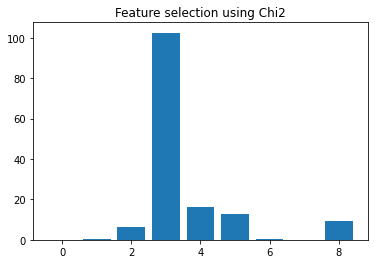

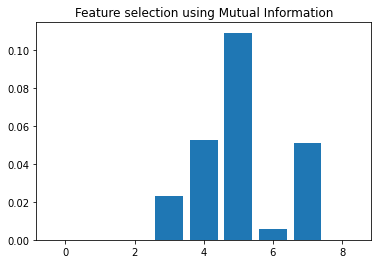

In [3]:
# Load the dataset
X, y = load_dataset("/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/breast-cancer.csv")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X, X_train,X_test)

# Prepare output data
y_train_enc, y_test_enc = prepare_outputs(y_train, y_test)

# feature selection using Chi2
X_train_enc_fs_chi2, X_test_enc_fs_chi2, fs_chi2 = select_features_chi2(X_train_enc, y_train_enc, X_test_enc)

# feature selection using mutualinfo
X_train_enc_fs_mi, X_test_enc_fs_mi, fs_mi = select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc)

# scores for the features
print("Feature scores using chi2")
for i in range(len(fs_chi2.scores_)):
    print("Feature %s : %f"%(i,fs_chi2.scores_[i]))

print("\nFeature scores using mutual information")
for i in range(len(fs_mi.scores_)):
    print("Feature %s : %f"%(i,fs_mi.scores_[i]))

# plot the scores
print("\n")
plt.bar([i for i in range(len(fs_chi2.scores_))],fs_chi2.scores_)
plt.title("Feature selection using Chi2")
plt.show()

print("\n")
plt.bar([i for i in range(len(fs_mi.scores_))],fs_mi.scores_)
plt.title("Feature selection using Mutual Information")
plt.show()


> Chi2 : We could see from the above graph that only 5 features are relevant, so we can set k value to 5

> Mutual Info : We could see that 7 features are relevant, so we can set k value to 7

In [4]:
# Modify the feature selection functions by defining k value
def select_features_chi2(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=chi2, k = 4)
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

def select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc):
    fs = SelectKBest(score_func=mutual_info_classif, k = 7)
    fs.fit(X_train_enc, y_train_enc)
    X_train_enc_fs = fs.transform(X_train_enc)
    X_test_enc_fs = fs.transform(X_test_enc)
    return X_train_enc_fs, X_test_enc_fs, fs

### Build the model

In [5]:
# Load the dataset
X, y = load_dataset("/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/breast-cancer.csv")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=111)

# Prepare input data
X_train_enc, X_test_enc = prepare_inputs(X, X_train,X_test)

# Prepare output data
y_train_enc, y_test_enc = prepare_outputs(y_train, y_test)

# feature selection using Chi2
X_train_enc_fs_chi2, X_test_enc_fs_chi2, fs_chi2 = select_features_chi2(X_train_enc, y_train_enc, X_test_enc)

# feature selection using mutualinfo
X_train_enc_fs_mi, X_test_enc_fs_mi, fs_mi = select_features_mutualinfo(X_train_enc, y_train_enc, X_test_enc)

# Build the models

# model without any feature selection
model1 = LogisticRegression(solver="lbfgs")
model1.fit(X_train_enc, y_train_enc)
y_pred1 = model1.predict(X_test_enc)
accuracy1 = accuracy_score(y_test_enc,y_pred1) * 100
print("Without any Feature selection accuracy is : %.2f"%(accuracy1))

# model using chi2 feature selection
model2 = LogisticRegression(solver="lbfgs")
model2.fit(X_train_enc_fs_chi2, y_train_enc)
y_pred2 = model2.predict(X_test_enc_fs_chi2)
accuracy2 = accuracy_score(y_test_enc,y_pred2) * 100
print("With chi2 Feature selection accuracy is : %.2f"%(accuracy2))

# model using Mutual Information feature selection
model3 = LogisticRegression(solver="lbfgs")
model3.fit(X_train_enc_fs_mi, y_train_enc)
y_pred3 = model3.predict(X_test_enc_fs_mi)
accuracy3 = accuracy_score(y_test_enc,y_pred3) * 100
print("With Mutual information Feature selection accuracy is : %.2f"%(accuracy3))

Without any Feature selection accuracy is : 77.89
With chi2 Feature selection accuracy is : 81.05
With Mutual information Feature selection accuracy is : 80.00


> Looks like here, Chi2 is doing a better job. Neverthless we have to try with KFold to be sure of the accuracy

<h2 style=text-align:left;color:purple;font:bold> How to Select Numerical input features </h2>

### ANOVA F-test Feature Selection

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

In [7]:
# loading the dataset
def load_dataset(filename):
    data = pd.read_csv(filename)
    dataset = data.values
    X = dataset[:,:-1]
    y = dataset[:,-1]
    return X, y

In [8]:
# feature selection using anova
def select_features_anova(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all') # learn relationship from training data fs.fit(X_train, y_train)
    # fit the model
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [9]:
# feature selection using mutual information
def select_features_mutualinfo(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k = "all")
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [10]:
# load the dataset
X, y = load_dataset("/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/Diabetes/pima-indians-diabetes.csv")

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# feature selection using anova
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features_anova(X_train, y_train, X_test)

# feature selection using mutual information
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features_mutualinfo(X_train, y_train, X_test)

Text(0.5, 1.0, 'Feature Importance using ANOVA')

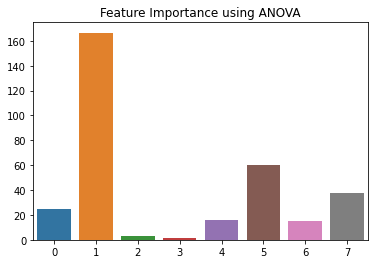

In [11]:
sns.barplot(x= [ele for ele in range(len(fs_anova.scores_))],y = fs_anova.scores_).set_title("Feature Importance using ANOVA")

Text(0.5, 1.0, 'Feature Importance using Mutual information')

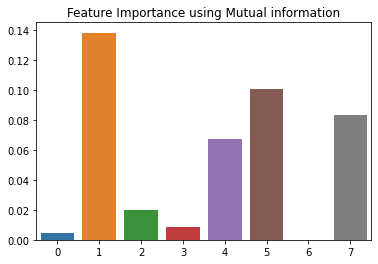

In [12]:
sns.barplot(x= [ele for ele in range(len(fs_mi.scores_))],y = fs_mi.scores_).set_title("Feature Importance using Mutual information")

In [13]:
# feature selection using anova
def select_features_anova(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k=6) # learn relationship from training data fs.fit(X_train, y_train)
    # fit the model
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# feature selection using mutual information
def select_features_mutualinfo(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k = 7)
    fs.fit(X_train,y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [14]:
# Building the model
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Build the model on ANOVA selected features
X_train_fs_anova, X_test_fs_anova, fs_anova = select_features_anova(X_train, y_train, X_test)
model = LogisticRegression(solver="liblinear")
model.fit(X_train_fs_anova, y_train)
y_pred_fs_anova = model.predict(X_test_fs_anova)

# Build the model on Mutual information selected features
X_train_fs_mi, X_test_fs_mi, fs_mi = select_features_mutualinfo(X_train, y_train, X_test)
model = LogisticRegression(solver = "liblinear")
model.fit(X_train_fs_mi, y_train)
y_pred_fs_mi = model.predict(X_test_fs_mi)

In [15]:
scores = []
scores.append(accuracy_score(y_test, y_pred))
scores.append(accuracy_score(y_test, y_pred_fs_anova))
scores.append(accuracy_score(y_test, y_pred_fs_mi))
print(scores)

[0.7705627705627706, 0.7575757575757576, 0.7489177489177489]


(0.0, 1.0)

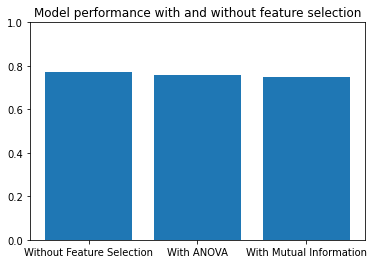

In [16]:
plt.bar(["Without Feature Selection","With ANOVA","With Mutual Information"],scores)
plt.title("Model performance with and without feature selection")
plt.ylim((0,1))

In [17]:
import plotly.express as px

In [19]:
px.bar(x = ["Without Feature Selection","With ANOVA","With Mutual Information"],y = scores)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'x=%{x}<br>y=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Without Feature Selection', 'With ANOVA', 'With Mutual Information'],
                         dtype=object),
              'xaxis': 'x',
              'y': array([0.77056277, 0.75757576, 0.74891775]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'margin': {'t': 60},
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'x'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'y'}}}
})